11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Training images: (60000, 28, 28)
Labels: [5 0 4 1 9 2 1 3 1 4]


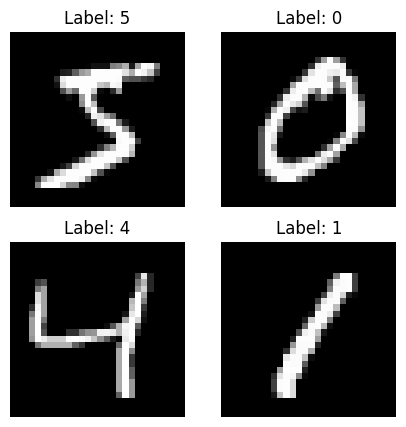

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/2
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 32s 18ms/step - accuracy: 0.8933 - loss: 0.3663 - val_accuracy: 0.9807 - val_loss: 0.0696
Epoch 2/2
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 32s 19ms/step - accuracy: 0.9794 - loss: 0.0704 - val_accuracy: 0.9822 - val_loss: 0.0584
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9774 - loss: 0.0655
Test Accuracy: 0.9825999736785889


In [1]:
# Install libraries
!pip install tensorflow matplotlib numpy scikit-learn pandas

# Import libraries
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Load MNIST dataset (handwritten digits)
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

# --- Metadata & Visualization ---
print("Training images:", X_train.shape)
print("Labels:", y_train[:10])

# Show sample images
plt.figure(figsize=(5,5))
for i in range(4):
    plt.subplot(2,2,i+1)
    plt.imshow(X_train[i], cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')
plt.show()

# --- Preprocessing ---
X_train = X_train / 255.0
X_test = X_test / 255.0
X_train = X_train.reshape(-1,28,28,1)
X_test = X_test.reshape(-1,28,28,1)

# --- CNN Model ---
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64,activation='relu'),
    tf.keras.layers.Dense(10,activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=2, validation_split=0.1, verbose=1)

# --- Evaluation ---
test_loss, test_acc = model.evaluate(X_test, y_test)
print("Test Accuracy:", test_acc)
